## Project IMHOTEP
### Comparison of SSS in IMHOTEP experiments (GAI, GAIa, S, GA, AI, GI) 
* This  notebook reads IMHOTEP outputs on JeanZay@IDRIS (here SSS at  monthly and yearly frequency).
* This notebook runs on machine JeanZay@ IDIRS on the prepost partition using: 

```
>> module load climate_science/
>> salloc --account bcn@cpu --ntasks=1 --cpus-per-task=5 --partition=prepost --hint=nomultithread --time=01:00:00 srun --pty bash
>> idrlab  # to launch a jupyter server
```


#### Import modules

In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# custom tools for plotting
import lib_SLXtools_IMHOTEP_2021 as slx

import cmocean

# for jupyter notebook display
%matplotlib inline

## Read IMHOTEP data
* Where to access the data:

In [73]:
prefix = "eORCA025.L75-IMHOTEP"
nexp = "S"
nexpREF = "GAI"
varna = 'sosaline'

# years to read data from:
y1='1991'
y2='2018'


fo="1y" # output frequency, could be "1y" or "1m"
applydt=False

#  input directory on store
diridref="/gpfsstore/rech/bcn/rcli002/eORCA025.L75/"+prefix+"."+nexpREF+"-S/"
diridat="/gpfsstore/rech/bcn/rcli002/eORCA025.L75/"+prefix+"."+nexp+"-S/"

# input directory on work
diri="/gpfswork/rech/bcn/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfsscratch/rech/bcn/regi915/PLT/"

* read files:

In [74]:
# read grid files
tmask = xr.open_dataset(diri+'mesh_hgr.nc')['tmask'][0,0,:,:]
nav_lon = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lon']
nav_lat = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lat']

# file list
sssfiles = diridat+fo+"/????/"+prefix+"."+nexp+"*gridTsurf.nc"
sssfilesREF = diridref+fo+"/????/"+prefix+"."+nexpREF+"*gridTsurf.nc"
print(sssfilesREF)

# read data we read only from year 1997 to 2007 to compare to GAIa analysis
sss1y = xr.open_mfdataset(sssfiles,concat_dim='time_counter',decode_times=True)[varna].sel(time_counter=slice(y1,y2))

# we read only from year 1997 to 2007 to compare to run GAIa
sss1y_ref = xr.open_mfdataset(sssfilesREF,concat_dim='time_counter',decode_times=True)[varna].sel(time_counter=slice(y1,y2))


/gpfsstore/rech/bcn/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.GAI-S/1y/????/eORCA025.L75-IMHOTEP.GAI*gridTsurf.nc


## compute  variance ratio

Apply detrending or not. If not, only the time-mean is removed before computing the std.

In [75]:
if applydt:
    dtype='linear'
    dtlab='dt'
else:
    dtype='constant' 
    dtlab='rm'

rmmean    = slx.detrend(sss1y.where(tmask!=0,-1000).compute(), 'time_counter', detrend_type=dtype)
std1 = rmmean.std(dim="time_counter")

rmmeanref    = slx.detrend(sss1y_ref.where(tmask!=0,-1000).compute(), 'time_counter', detrend_type=dtype)
stdref = rmmeanref.std(dim="time_counter")

# stdS / stdGAI   or stdGAI / stdGAIa
ratio = (std1/stdref).compute()

## Prepare some gridpoints indices

In [38]:
# 0N, 180
gp1=[429,684]

print(nav_lon.isel(x=gp1[0],y=gp1[1]).values)
print(nav_lat.isel(x=gp1[0],y=gp1[1]).values)

# 100E,-7S
gp2=[109,656]

print(nav_lon.isel(x=gp2[0],y=gp2[1]).values)
print(nav_lat.isel(x=gp2[0],y=gp2[1]).values)

# 55E-1S
gp="gp3"
gp3=[1369,680]

print(nav_lon.isel(x=gp3[0],y=gp3[1]).values)
print(nav_lat.isel(x=gp3[0],y=gp3[1]).values)

180.0
0.0
100.0
-6.9826508
55.0
-0.9999492


## Plot timeseries at 3 gridpoints

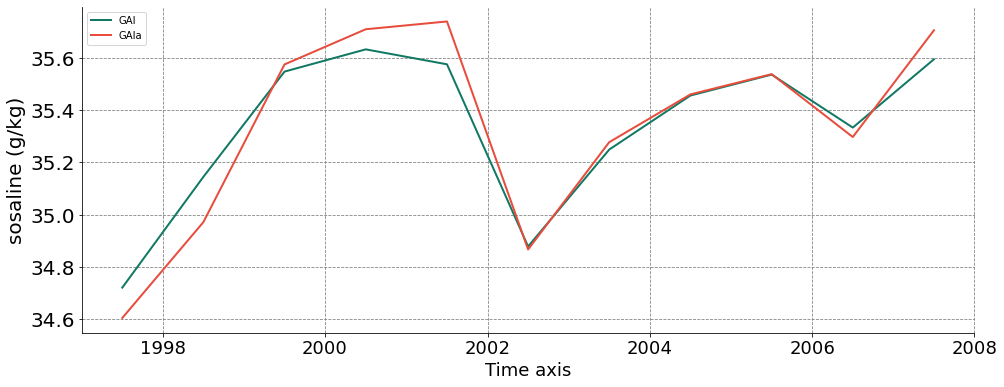

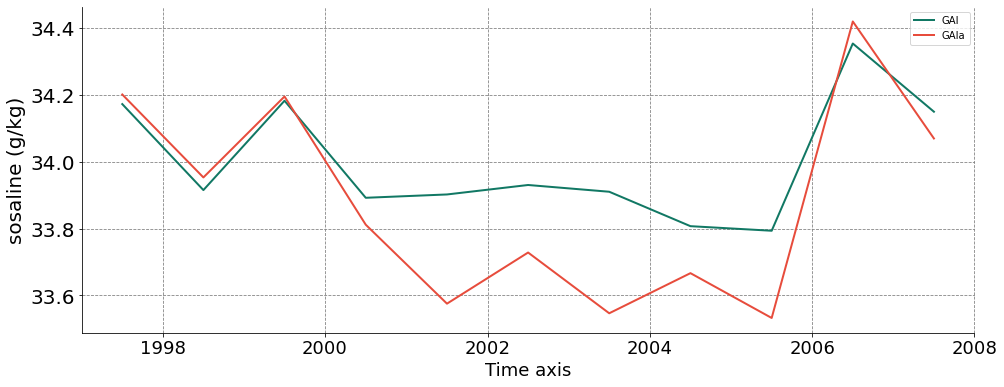

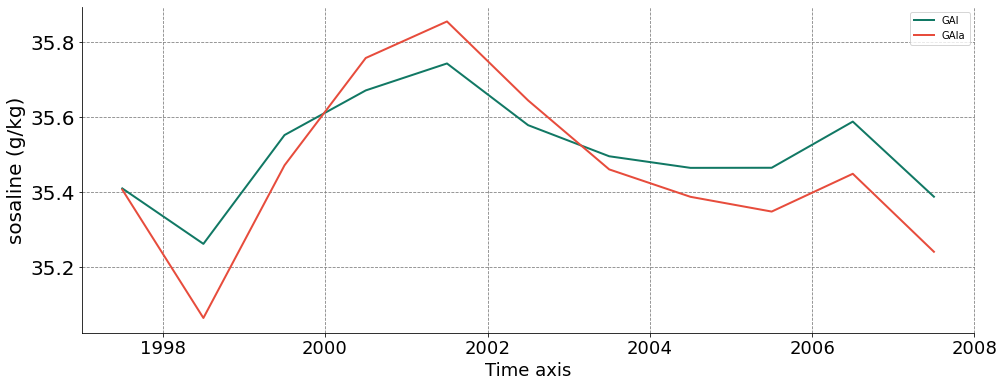

In [39]:
for gp in ["gp1", "gp2","gp3"]:
#for gp in ["gp3"]:    
    if (gp=="gp1"):
        xl=gp1[0]
        yl=gp1[1]   
    
    if (gp=="gp2"):
        xl=gp2[0]
        yl=gp2[1]
                
    if (gp=="gp3"):
        xl=gp3[0]
        yl=gp3[1]

    namo="TS"+fo+"SSS_"+gp+"_"+nexp+"-"+nexpREF+"_"+y1+"-"+y2+".png"
    labelplt=varna+" (g/kg)"

    # data to plot
    datplt = sss1y.isel(x=xl,y=yl)
    datplt2 = sss1y_ref.isel(x=xl,y=yl)

    # create fig
    fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

    # plot data
    datplt.plot(linewidth=2,color='#117864',label=nexp)
    datplt2.plot(linewidth=2,color='#e74c3c',label=nexpREF)

    # plot customization
    ax = plt.gca()    
    ax.grid(which='both', color='grey', linestyle='--')
    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(True)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(True)  

    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(18)

    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=20)

    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')

    plt.xticks(rotation=0, ha='center',va="top")

    plt.ylabel(labelplt)
    plt.legend()

    plt.show()

    # Save fig in png, resolution dpi    
    slx.saveplt(fig1,diro,namo,dpifig=300)
    plt.close(fig1)


## Global variance ratio map

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


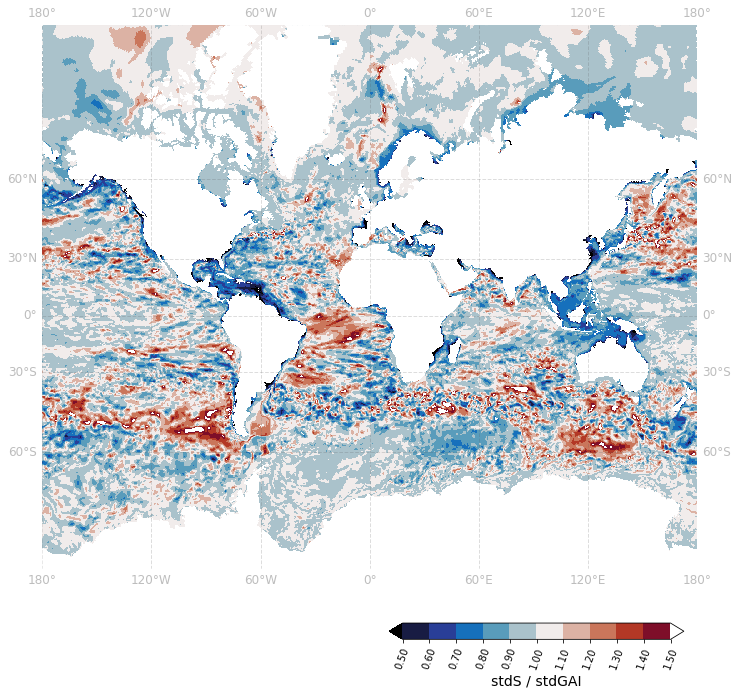

In [76]:
loncentr=0

minlat=-80.0
maxlat=83.0
minlon= -180
maxlon=179

loncentr=0
gridl=False
incrgridlon=60
incrgridlat=30

data2plot = ratio
data2plot = data2plot.where(tmask!=0,1000).squeeze()

namo = "JZmapGLO_SSSstdratio_"+fo+dtlab+"_"+nexp+"_"+y1+"-"+y2

lon2plot   = nav_lon.squeeze()
lat2plot   = nav_lat.squeeze()


#========= Plot settings ===============
levbounds=[0.5,1.6,0.1]

# customed colormapls
cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.balance,cu='k',co='w')

fig3 = plt.figure(figsize=([18,10]),facecolor='white')

# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

ax = plt.axes(projection= ccrs.Mercator(central_longitude=loncentr,min_latitude=minlat, max_latitude=maxlat, globe=None))
cs  = plt.pcolormesh(lon2plot, lat2plot, data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)
transform = trdata._as_mpl_transform(ax)


# coastlines and gridlines
#cl = ax.coastlines(color= '#BDBDBD')
gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')

label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
gl.xlabel_style = label_style
#gl.xlabels_bottom = False
gl.ylabel_style = label_style
#gl.ylabels_right = False

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axis('off')

#global map>> comment on: ax.set_extent([minlon, maxlon, minlat, maxlat])

cbon=True

if cbon:
        tlabel="std"+nexp+" / std"+nexpREF
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=1,tformat="%.2f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.3,0.9,0.2))  

plt.show()

# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,namo,dpifig=200)
plt.close(fig3)


## detrended timeseries

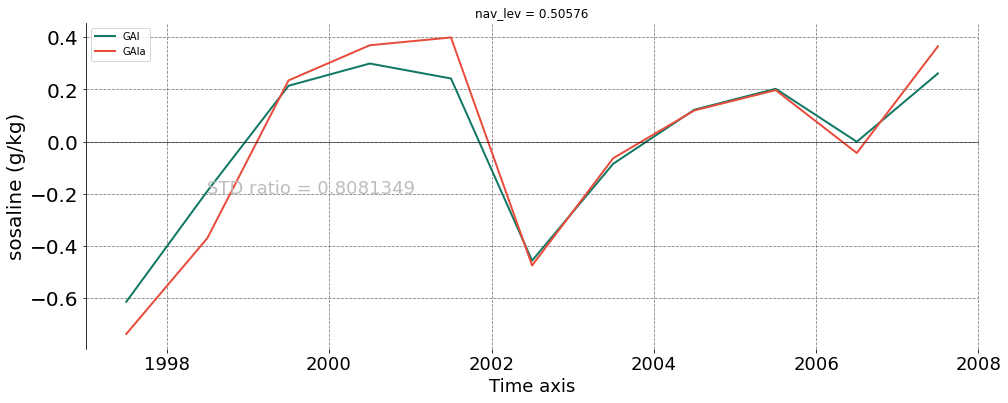

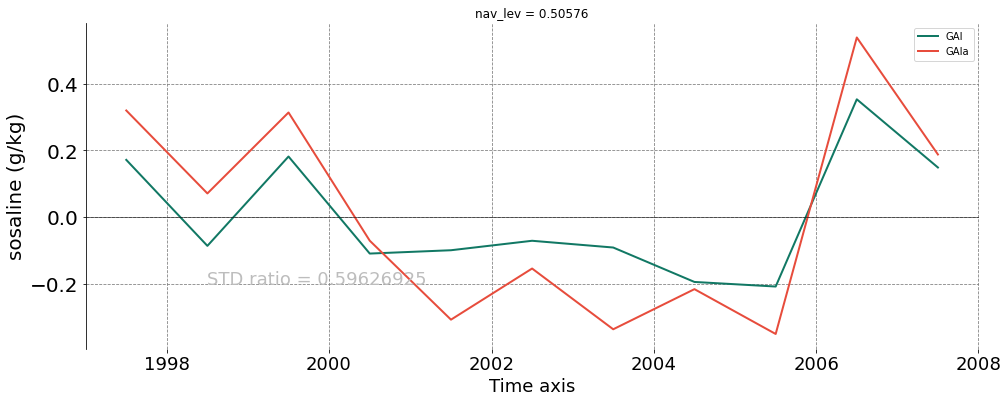

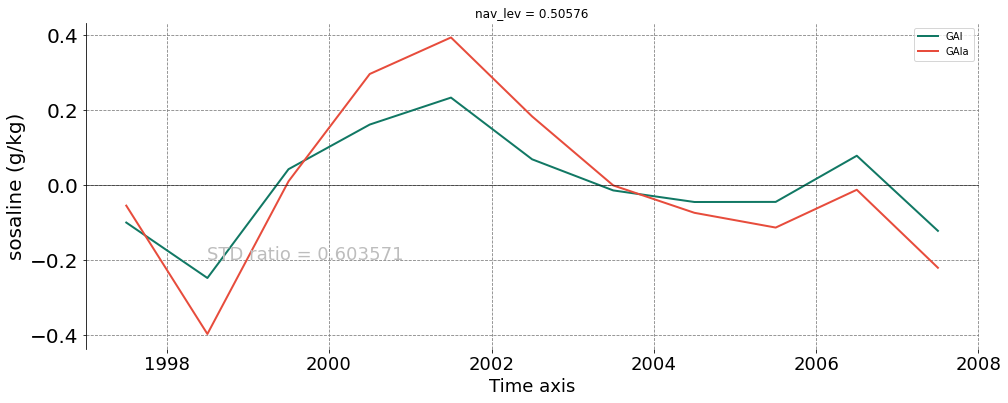

In [41]:
for gp in ["gp1", "gp2","gp3"]:
    
    if (gp=="gp1"):
        xl=gp1[0]
        yl=gp1[1]   
    
    if (gp=="gp2"):
        xl=gp2[0]
        yl=gp2[1]
                
    if (gp=="gp3"):
        xl=gp3[0]
        yl=gp3[1]

    namo="TS"+fo+dtlab+"_SSS_"+gp+"_"+nexp+"-"+nexpREF+"_"+y1+"-"+y2+".png"
    labelplt=varna+" (g/kg)"

    # data to plot
    datplt = rmmean.isel(x=xl,y=yl)
    datplt2 = rmmeanref.isel(x=xl,y=yl)
    gpratio = ratio.isel(x=xl,y=yl)

    # create fig
    fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

    # plot data
    datplt.plot(linewidth=2,color='#117864',label=nexp)
    datplt2.plot(linewidth=2,color='#e74c3c',label=nexpREF)

    # plot customization
    ax = plt.gca()    
    ax.grid(which='both', color='grey', linestyle='--')
    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(True)  

    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(18)

    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=20)

    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')

    plt.xticks(rotation=0, ha='center',va="top")
    plt.axhline(y=0,color='k',linewidth=0.5)

    tiplt = "STD ratio = "+str(gpratio.values)
    #transform = trdata._as_mpl_transform(ax)  
    ax.annotate(tiplt,xy=(np.datetime64('1998-07-02T12:00:00.000000000'),-0.2),xycoords='data', color='#BDBDBD',size=18,zorder=10)

    
    plt.ylabel(labelplt)
    plt.legend()

    plt.show()

    # Save fig in png, resolution dpi    
    slx.saveplt(fig1,diro,namo,dpifig=300)
    plt.close(fig1)
